In [1]:
import numpy as np
import struct
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def read_image(filename):
    binfile = open(filename, 'rb')
    buffers = binfile.read()
    head = struct.unpack_from('>IIII', buffers, 0)
    offset = struct.calcsize('>IIII')
    imgNum = head[1]
    width = head[2]
    height = head[3]
    bits = imgNum * width * height
    bitsString = '>' + str(bits) + 'B'
    imgs = struct.unpack_from(bitsString, buffers, offset)
    binfile.close()
    imgs = np.reshape(imgs, [imgNum, width * height])
    return imgs

def read_label(filename):
    binfile = open(filename, 'rb')
    buffers = binfile.read()
    head = struct.unpack_from('>II', buffers, 0)
    labelNum = head[1]
    offset = struct.calcsize('>II')
    numString = '>' + str(labelNum) + "B"
    labels = struct.unpack_from(numString, buffers, offset)
    binfile.close()
    labels = np.reshape(labels, [labelNum])
    return labels


def load_mnist(path, kind='train'):
    """Load MNIST data from `path`"""
    labels_path = path + '%s-labels.idx1-ubyte' % kind
    images_path = path + '%s-images.idx3-ubyte' % kind
    labels = read_label(labels_path)
    images = read_image(images_path)
    return images, labels


def save_mnist(path, kind='train'):
    images, labels = load_mnist(path, kind)
    df = pd.DataFrame(images)
    df.to_csv(path + '%s-images.csv' % kind, index=False)
    df = pd.DataFrame(labels)
    df.to_csv(path + '%s-labels.csv' % kind, index=False)


train_images, train_labels = load_mnist('RawData/', kind='train')
test_images, test_labels = load_mnist('RawData/', kind='t10k')

Example

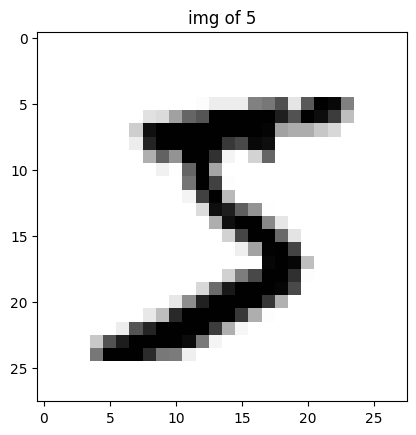

In [2]:
plt.imshow(train_images[0].reshape(28, 28), cmap=cm.binary)
plt.title(f"img of {train_labels[0]}")
plt.show()

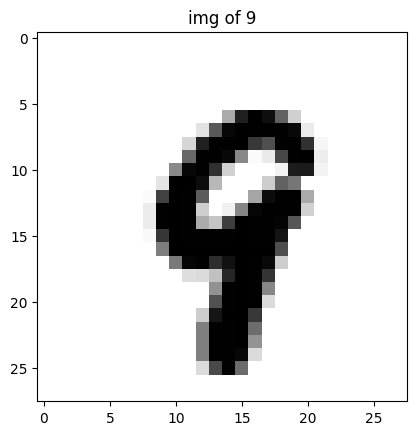

In [3]:
plt.imshow(train_images[6969].reshape(28, 28), cmap=cm.binary)
plt.title(f"img of {train_labels[6969]}")
plt.show()

In [4]:
import warnings
warnings.filterwarnings('ignore')

train_images = train_images / 255
test_images = test_images / 255

train_images = train_images.reshape(60000, 28, 28)
test_images = test_images.reshape(10000, 28, 28)

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_labels = train_labels.astype('int32')
test_labels = test_labels.astype('int32')

train_df = pd.DataFrame()
test_df = pd.DataFrame()

train_df['label'] = train_labels
test_df['label'] = test_labels

for i in range(784):
    train_df['pixel' + str(i)] = train_images[:, :, :].reshape(60000, 784)[:, i]
    test_df['pixel' + str(i)] = test_images[:, :, :].reshape(10000, 784)[:, i]

print(train_df.shape)
print(test_df.shape)

(60000, 785)
(10000, 785)


In [ ]:
import os

os.makedirs('Data', exist_ok=True)
train_df.to_csv('Data/train.csv', index=False)
test_df.to_csv('Data/test.csv', index=False)